## **파이썬 딥러닝 텐서플로 03. Keras**

0530 월요일 과제 [개념+필사]

### **01 딥러닝 준비**

#### **1-1** 주요 용어

**1-1-1 하이퍼 파라미터(hyper-parameter)**

딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값.
* **튜닝(tuning)**: 하이퍼 파라미터의 값을 조절하는 행위

**1-1-2 과소적합 vs. 과대적합(underfitting vs overfitting)**

* 과소적합: 모델이 충분히 학습되지 않은 경우에 예측 성능이 떨어짐.
* 과대적합: 학습 데이터를 지나치게 반복 학습하여 과하게 적합된 상태.

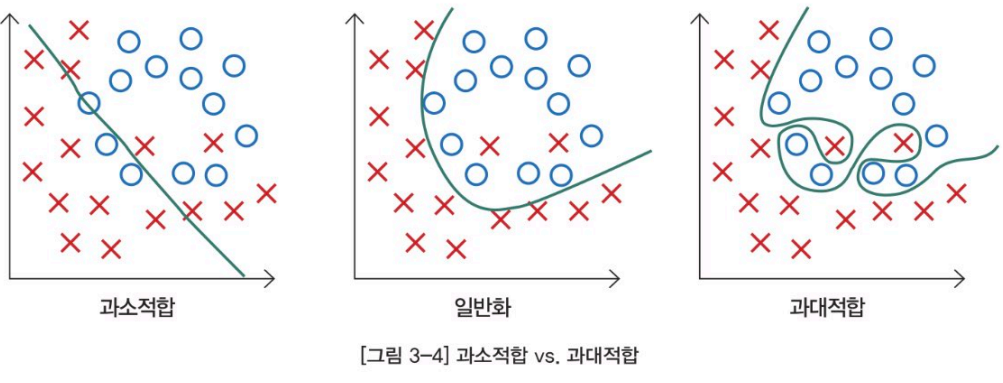

**1-1-3 에포크(epoch)**

* **1 epoch**: 딥러닝 모델이 반복 훈련을 할 때 데이터 셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)

**1-1-4 손실함수(loss function)**

예측 값과 정답 값의 차이 또는 오차(Error).
* 오차: 딥러닝 모델의 출력 값과 실제 값의 차이

지도 학습(supervised learning) 분류
* 이진 분류(binary classification): `binary_crossentropy`
    * 출력층의 활성화 함수(activation function)가 sigmoid인 경우.
* 다중 분류(multi-class classification)
    * 다중 분류의 대상이 되는 클래스가 원핫 벡터(one-hot vector): `categorical_crossentropy`
    * 정답 클래스가 원핫 인코딩이 아닌 레이블값으로 표현되어 서로 다른 숫자로 구분: `sparse_categorical_crossentropy`
    * 출력층의 활성화 함수로 softmax 사용

회귀 모델
* 평균제곱오차(Mean Squared Error)
* 평균절대값오차(Mean Absolute Error)
* 후버(Huber)

[손실함수 목록]

||분류|회귀|
|------|---|---|
|함수|- binary_crossentropy<br/>- categorical_crossentropy<br/>- sparse_categorical_crossentropy|- mean_squared_error<br/>- mean_absolute_error<br/>- mean_absolute_percentage_error<br/>- mean_squared_logarithmic_error<br/>- huber|
|클래스|- BinaryCrossentropy<br/>- CategoricalCrossentropy<br/>- SparseCategoricalCrossentropy|- MeanSquaredError<br/>- MeanAbsoluteError<br/>- MeanAbsolutePercentageError<br/>- MeanSquaredLogarithmicError<br/>- Huber|

In [ ]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy()

**1-1-5 경사하강법(gradient descent)**

딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법.

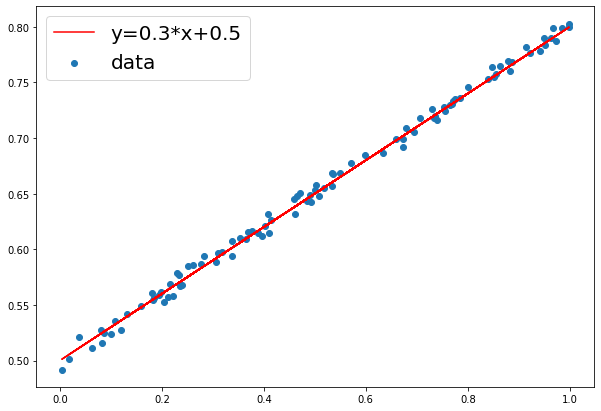

w:0.3, b:0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w:{w}, b:{b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [18]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w*x + b

    # Loss Function 정의
    error = 0.5 * ((y_hat - y)**2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y)*x).sum()
    b = b - learning_rate * (y_hat - y).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print('{0:2} w={1:.5f}, b={2:.5f} error={3:.5f}'.format(epoch, w, b, error))

print('-----' * 15)
print('{0:2} w={1:.1f}, b={2:.1f} error={3:.5f}'.format(epoch, w, b, error))

 0 w=0.48733, b=0.25825 error=7.74271
 5 w=0.50921, b=0.38719 error=0.19264
10 w=0.47822, b=0.40482 error=0.13883
15 w=0.45162, b=0.41919 error=0.10032
20 w=0.42904, b=0.43138 error=0.07260
25 w=0.40989, b=0.44172 error=0.05265
30 w=0.39364, b=0.45049 error=0.03829
35 w=0.37986, b=0.45794 error=0.02795
40 w=0.36816, b=0.46425 error=0.02051
45 w=0.35824, b=0.46961 error=0.01515
50 w=0.34982, b=0.47416 error=0.01129
55 w=0.34268, b=0.47801 error=0.00852
60 w=0.33662, b=0.48128 error=0.00652
65 w=0.33148, b=0.48406 error=0.00508
---------------------------------------------------------------------------
66 w=0.3, b=0.5 error=0.00485


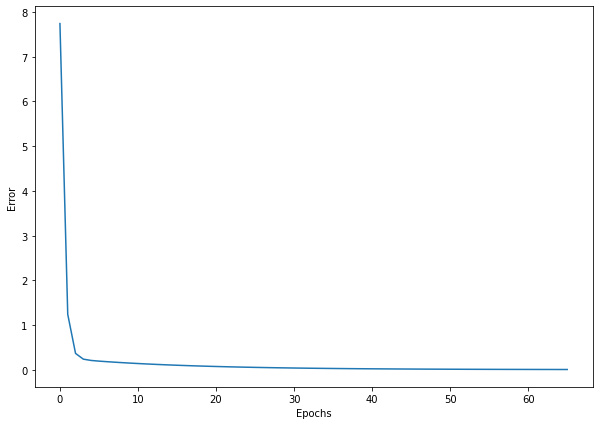

In [19]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

#### **1-2** 딥러닝 프로세스

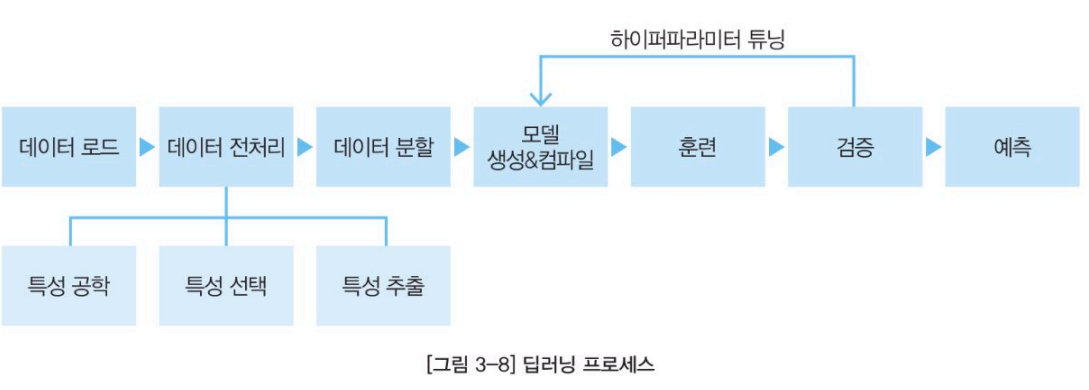

**1-2-1 데이터 전처리**

데이터를 모델에 주입하기 전에 데이터를 가공하는 단계.

**1-2-2 모델 생성**

모델의 구조를 정의하고 생성하는 단계.
* Sequantial API
* Functional API
* Model Subclassing

**1-2-3 모델 컴파일**

* 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등 정의
* 모델 인스턴스에 `compile` 메소드 적용
* 앞에서 열거한 여러가지 속성 값 설정

**1-2-4 모델 훈련**

* `fit`함수에 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달
* 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등 지정

**1-2-5 모델 검증**

훈련이 완료된 모델 검증하는 단계.
* 모델 훈련시 사용하지 않은 검증 데이터셋을 입력하고 예측 값을 정답과 비교하여 평가지표 계산

**1-2-6 모델 예측**

훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 결과 반환.

### **02 단순 신경망 훈련**

#### **2-1** 선형회귀

* y = wx + b
    * w: 가중치, b: 편향

#### **2-2** 뉴런(Neuron)

인공 신경망 모델을 구성하는 하나의 신경.

#### **2-3** Dense 레이어

심층 신경망 모델을 구성하는 가장 기본 레이어. 완전 연결층(Fully Connected Layer).

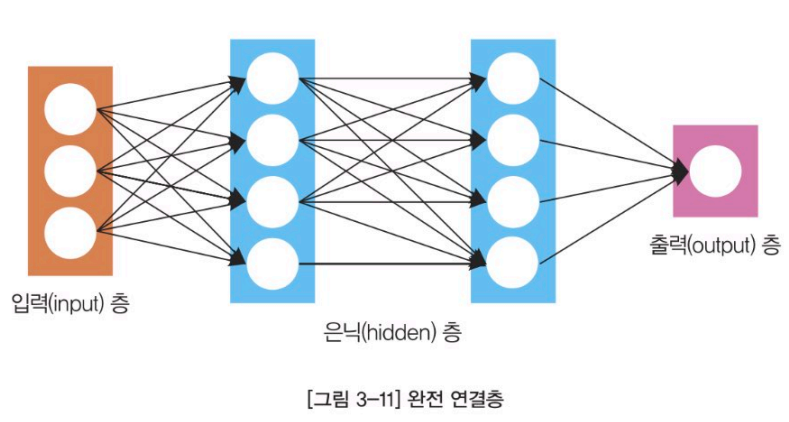

In [35]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

#### **2-4** 데이터셋 만들기

In [37]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3*x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


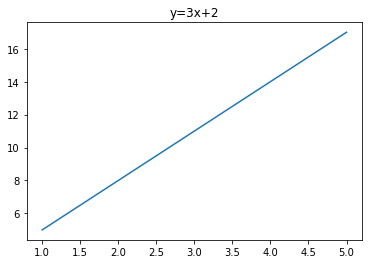

In [38]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

#### **2-5** Sequential API

시퀀스에 맞게 일렬로 연결하는 방식. 입력 레이어부터 출력 레이어까지 순서를 가짐.

**2-5-1 모델 구조**

In [39]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),                     
])

In [40]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

**2-5-2 입력 데이터 형태**

In [41]:
import tensorflow as tf
model = tf.keras.Sequential([
  # 입력 데이터의 shape = (150,4)인 경우 input_shape 지정
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1),                           
])

**2-5-3 단순선형회귀 모델 정의**

In [42]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])                     
])

#### **2-6** 모델 요약

In [43]:
# 모델 요약
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### **2-7** 컴파일

In [44]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [45]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [49]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [52]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### **2-8** 훈련

In [53]:
# 훈련
model.fit(x,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 298ms/step - loss: 216.1541 - mae: 13.6319
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 126.0128 - mae: 10.4382
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 73.4827 - mae: 8.0002
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 42.8703 - mae: 6.1389
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 25.0307 - mae: 4.7179


In [54]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])                    
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 549ms/step - loss: 144.9121 - mae: 11.2250
Epoch 2/1200
1/1 [==============================] - 0s 13ms/step - loss: 84.5326 - mae: 8.6110
Epoch 3/1200
1/1 [==============================] - 0s 8ms/step - loss: 49.3458 - mae: 6.6154
Epoch 4/1200
1/1 [==============================] - 0s 24ms/step - loss: 28.8401 - mae: 5.0918
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 16.8899 - mae: 3.9286
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 9.9253 - mae: 3.0405
Epoch 7/1200
1/1 [==============================] - 0s 7ms/step - loss: 5.8661 - mae: 2.3624
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 3.5001 - mae: 1.8446
Epoch 9/1200
1/1 [==============================] - 0s 8ms/step - loss: 2.1207 - mae: 1.4492
Epoch 10/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.3163 - mae: 1.1472
Epoch 11/1200
1/1 [==============================] - 0s

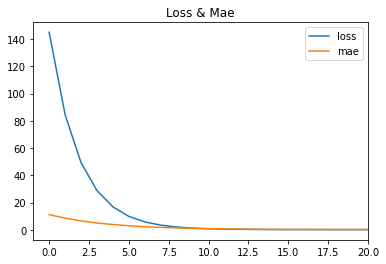

In [57]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss & Mae')
plt.legend()
plt.show()

#### **2-9** 검증

In [58]:
# 검증
model.evaluate(x,y)

1/1 [==============================] - 0s 264ms/step - loss: 6.1095e-05 - mae: 0.0067


[6.109541573096067e-05, 0.006708907894790173]

#### **2-10** 예측

In [59]:
# 예측
model.predict([10])

array([[32.032425]], dtype=float32)

### **03 심층 신경망으로 이미지 분류**

#### **3-1** 케라스 내장 데이터셋 로드

* boston_housing: 보스톤 주택 가격 데이터셋(회귀)
* cifar10: CIFAR10 이미지 분류 데이터셋(분류)
* cifar100: CIFAR100 이미지 분류 데이터셋(분류)
* mnist: mnist 손글씨 데이터셋(분류)
* fashion_mnist: 의류 데이터셋(분류)
* imdb: IMDb 영화 데이터셋(분류)
* reuters: Reuters 뉴스 토픽(분류)

In [60]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [61]:
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [62]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


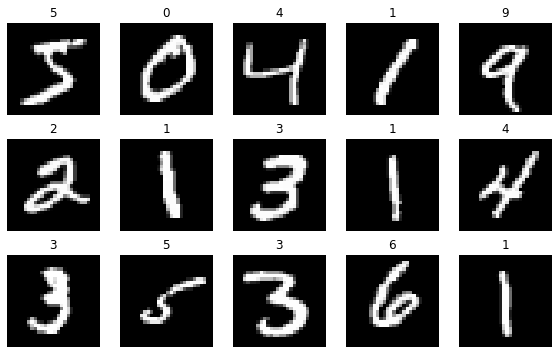

In [63]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

#### **3-2** 데이터 전처리

In [64]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [65]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [66]:
# test 셋에서 정규화 동일 적용
x_test = x_test / x_test.max()

In [67]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

#### **3-3** Flatten 레이어

In [68]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [69]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


#### **3-4** 활성화 함수

* 시그모이드(Sigmoid)
* 하이퍼볼릭 탄젠트(Hyperbolic Tangent 혹은 tanh)
* ReLU(Rectified Unit)
* Leaky ReLU

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [71]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')                    
])

#### **3-5** 입력과 출력

In [72]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개 (클래스 개수와 동일)
        tf.keras.layers.Dense(10, activation='softmax')                    
])

In [73]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

#### **3-6** 손실함수

|마지막 출력층|Loss|
|------|---|
|Dense(1, activation='sigmoid')|loss='binary_crossentropy'|
|Dense(2 이상, activation='softmax')|loss='categorical_crossentropy'<br/>loss='sparse_categorical_crossentropy'|

In [74]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [75]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

#### **3-7** 옵티마이저

손실을 낮추기 위해서 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법. 가장 많이 사용되는 것은 Adam.

In [76]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### **3-8** 평가지표

In [77]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [78]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **3-9** 훈련

In [79]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2285 - accuracy: 0.9317 - val_loss: 0.1316 - val_accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0939 - accuracy: 0.9709 - val_loss: 0.1062 - val_accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0673 - accuracy: 0.9790 - val_loss: 0.0739 - val_accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0488 - accuracy: 0.9845 - val_loss: 0.0721 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0879 - val_accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0338 - accuracy: 0.9886 - val_loss: 0.0922 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0928 - val_acc

#### **3-10** 평가

In [80]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0949 - accuracy: 0.9794
검증 셋 정확도: 0.9793999791145325


#### **3-11** 예측

In [81]:
# 예측
predictions = model.predict(x_test)

In [82]:
# 예측 결과 출력
predictions[0]

array([5.9328638e-13, 4.7725313e-09, 2.9756125e-08, 3.1791078e-08,
       8.8009190e-11, 7.1662343e-13, 1.4081132e-15, 9.9999988e-01,
       1.8477539e-09, 7.2132622e-08], dtype=float32)

In [83]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


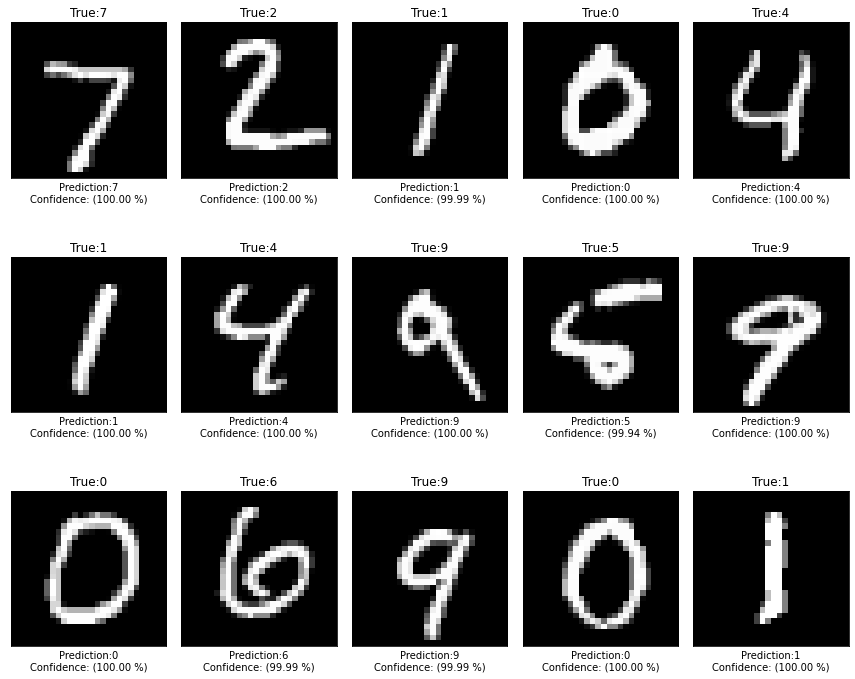

In [88]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
    return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True:{y_true}')
    ax.set_xlabel(f'Prediction:{y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()

### **04 모델 세부 설정**

In [89]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


#### **4-1** 초기값 설정

In [91]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [92]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


#### **4-2** 규제

In [93]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_37',
 'trainable': True,
 'units': 256,
 'use_bias': True}

In [94]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


#### **4-1** 드롭아웃(Dropout)

모델의 과대적합 문제를 해결하기 위해 'Dropout: A simple Way to Prevent Neural Networks form Overfitting' 논문에서 제안된 아이디어.

* 노드의 일부 신호를 임의로 삭제하여 모델의 과대적합 방지
* 모델이 훈련할 때는 드롭아웃이 적용되어 일부만 훈련하지만, 예측 시점에는 모든 노드가 활용됨.

In [95]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

#### **4-4** 배체 정규화(Batch Normalization)

각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화

In [97]:
# Model A: Dense + ReLU

model_a = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                50240     
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Model B: Dense + BatchNorm + ReLU

model_b = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # 배치 정규화 후 활성화 함수 적용
          tf.keras.layers.Activation('relu'),

          tf.keras.layers.Dense(32),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # 배치 정규화 후 활성화 함수 적용
          tf.keras.layers.Activation('relu'),

          tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                     

#### **4-5** 활성화(activation) 함수

In [99]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [100]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)

model_c = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # LeakyReLU, alpha=0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),

          tf.keras.layers.Dense(32),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # LeakyReLU, alpha=0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),

          tf.keras.layers.Dense(10, activation='softmax'),
])
model_c.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                     

In [101]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3014 - accuracy: 0.9139 - val_loss: 0.1659 - val_accuracy: 0.9492
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1389 - accuracy: 0.9582 - val_loss: 0.1253 - val_accuracy: 0.9609
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1026 - accuracy: 0.9694 - val_loss: 0.1063 - val_accuracy: 0.9663
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0811 - accuracy: 0.9756 - val_loss: 0.0964 - val_accuracy: 0.9703
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0668 - accuracy: 0.9797 - val_loss: 0.1022 - val_accuracy: 0.9705
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0562 - accuracy: 0.9821 - val_loss: 0.0942 - val_accuracy: 0.9716
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0914 - val_accura

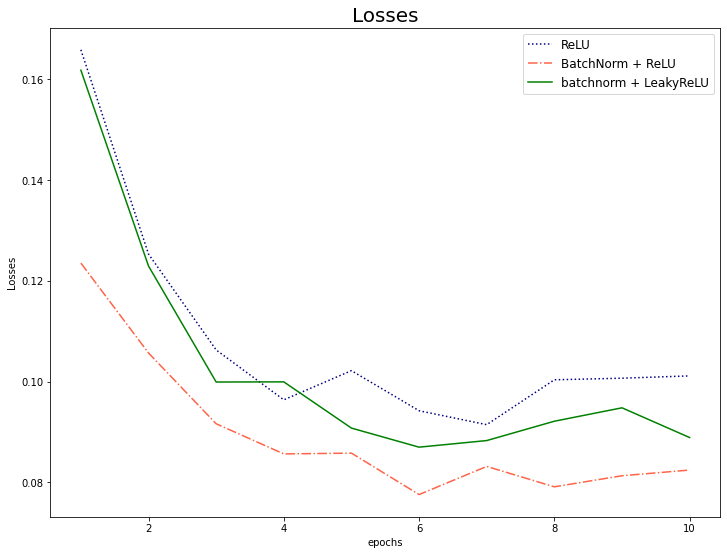

In [102]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'batchnorm + LeakyReLU'], fontsize=12)
plt.show()